# Compare outcomes from differential analysis based on different imputation methods

- load scores based on `10_1_ald_diff_analysis`

In [1]:
import logging
from pathlib import Path

import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from IPython.display import display

import pimmslearn
import pimmslearn.databases.diseases

logger = pimmslearn.logging.setup_nb_logger()

plt.rcParams['figure.figsize'] = (2, 2)
fontsize = 5
pimmslearn.plotting.make_large_descriptors(fontsize)
logging.getLogger('fontTools').setLevel(logging.ERROR)

# catch passed parameters
args = None
args = dict(globals()).keys()

## Parameters
Default and set parameters for the notebook.

In [2]:
folder_experiment = 'runs/appl_ald_data/plasma/proteinGroups'

target = 'kleiner'
model_key = 'VAE'
baseline = 'RSN'
out_folder = 'diff_analysis'
selected_statistics = ['p-unc', '-Log10 pvalue', 'qvalue', 'rejected']

disease_ontology = 5082  # code from https://disease-ontology.org/
# split diseases notebook? Query gene names for proteins in file from uniprot?
annotaitons_gene_col = 'PG.Genes'

In [3]:
# Parameters
disease_ontology = 10652
folder_experiment = "runs/alzheimer_study"
target = "AD"
baseline = "PI"
model_key = "QRILC"
out_folder = "diff_analysis"
annotaitons_gene_col = "None"


Add set parameters to configuration

In [4]:
params = pimmslearn.nb.get_params(args, globals=globals())
args = pimmslearn.nb.Config()
args.folder_experiment = Path(params["folder_experiment"])
args = pimmslearn.nb.add_default_paths(args,
                                 out_root=(
                                     args.folder_experiment
                                     / params["out_folder"]
                                     / params["target"]
                                     / f"{params['baseline']}_vs_{params['model_key']}"))
args.update_from_dict(params)
args.scores_folder = scores_folder = (args.folder_experiment
                                      / params["out_folder"]
                                      / params["target"]
                                      / 'scores')
args.freq_features_observed = args.folder_experiment / 'freq_features_observed.csv'
args

root - INFO     Removed from global namespace: folder_experiment


root - INFO     Removed from global namespace: target


root - INFO     Removed from global namespace: model_key


root - INFO     Removed from global namespace: baseline


root - INFO     Removed from global namespace: out_folder


root - INFO     Removed from global namespace: selected_statistics


root - INFO     Removed from global namespace: disease_ontology


root - INFO     Removed from global namespace: annotaitons_gene_col


root - INFO     Already set attribute: folder_experiment has value runs/alzheimer_study


root - INFO     Already set attribute: out_folder has value diff_analysis


{'annotaitons_gene_col': 'None',
 'baseline': 'PI',
 'data': PosixPath('runs/alzheimer_study/data'),
 'disease_ontology': 10652,
 'folder_experiment': PosixPath('runs/alzheimer_study'),
 'freq_features_observed': PosixPath('runs/alzheimer_study/freq_features_observed.csv'),
 'model_key': 'QRILC',
 'out_figures': PosixPath('runs/alzheimer_study/figures'),
 'out_folder': PosixPath('runs/alzheimer_study/diff_analysis/AD/PI_vs_QRILC'),
 'out_metrics': PosixPath('runs/alzheimer_study'),
 'out_models': PosixPath('runs/alzheimer_study'),
 'out_preds': PosixPath('runs/alzheimer_study/preds'),
 'scores_folder': PosixPath('runs/alzheimer_study/diff_analysis/AD/scores'),
 'selected_statistics': ['p-unc', '-Log10 pvalue', 'qvalue', 'rejected'],
 'target': 'AD'}

### Excel file for exports

In [5]:
files_out = dict()
writer_args = dict(float_format='%.3f')

fname = args.out_folder / 'diff_analysis_compare_methods.xlsx'
files_out[fname.name] = fname
writer = pd.ExcelWriter(fname)
logger.info("Writing to excel file: %s", fname)

root - INFO     Writing to excel file: runs/alzheimer_study/diff_analysis/AD/PI_vs_QRILC/diff_analysis_compare_methods.xlsx


## Load scores

### Load baseline model scores
Show all statistics, later use selected statistics

In [6]:
fname = args.scores_folder / f'diff_analysis_scores_{args.baseline}.pkl'
scores_baseline = pd.read_pickle(fname)
scores_baseline

model                                      PI                        \
var                                        SS DF      F p-unc   np2   
protein groups               Source                                   
A0A024QZX5;A0A087X1N8;P35237 AD         0.343  1  0.804 0.371 0.004   
                             age        0.027  1  0.064 0.801 0.000   
                             Kiel       1.266  1  2.971 0.086 0.015   
                             Magdeburg  3.538  1  8.299 0.004 0.042   
                             Sweden     5.626  1 13.196 0.000 0.065   
...                                       ... ..    ...   ...   ...   
S4R3U6                       AD         0.584  1  0.594 0.442 0.003   
                             age        0.753  1  0.767 0.382 0.004   
                             Kiel       0.000  1  0.000 0.991 0.000   
                             Magdeburg  1.475  1  1.501 0.222 0.008   
                             Sweden    23.267  1 23.675 0.000 0.110   

model                                                                 
var                                    -Log10 pvalue qvalue rejected  
protein groups               Source                                   
A0A024QZX5;A0A087X1N8;P35237 AD                0.431  0.536    False  
                             age               0.097  0.878    False  
                             Kiel              1.063  0.186    False  
                             Magdeburg         2.355  0.017     True  
                             Sweden            3.443  0.002     True  
...                                              ...    ...      ...  
S4R3U6                       AD                0.355  0.600    False  
                             age               0.418  0.546    False  
                             Kiel              0.004  0.995    False  
                             Magdeburg         0.654  0.374    False  
                             Sweden            5.623  0.000     True  

[7105 rows x 8 columns]

### Load selected comparison model scores

In [7]:
fname = args.scores_folder / f'diff_analysis_scores_{args.model_key}.pkl'
scores_model = pd.read_pickle(fname)
scores_model

model                                   QRILC                        \
var                                        SS DF      F p-unc   np2   
protein groups               Source                                   
A0A024QZX5;A0A087X1N8;P35237 AD         0.677  1  4.428 0.037 0.023   
                             age        0.011  1  0.070 0.792 0.000   
                             Kiel       0.389  1  2.546 0.112 0.013   
                             Magdeburg  0.887  1  5.797 0.017 0.029   
                             Sweden     2.369  1 15.490 0.000 0.075   
...                                       ... ..    ...   ...   ...   
S4R3U6                       AD         5.563  1  3.119 0.079 0.016   
                             age        1.189  1  0.667 0.415 0.003   
                             Kiel       7.405  1  4.152 0.043 0.021   
                             Magdeburg 16.157  1  9.060 0.003 0.045   
                             Sweden     0.173  1  0.097 0.756 0.001   

model                                                                 
var                                    -Log10 pvalue qvalue rejected  
protein groups               Source                                   
A0A024QZX5;A0A087X1N8;P35237 AD                1.436  0.089    False  
                             age               0.101  0.865    False  
                             Kiel              0.950  0.216    False  
                             Magdeburg         1.769  0.048     True  
                             Sweden            3.935  0.001     True  
...                                              ...    ...      ...  
S4R3U6                       AD                1.103  0.164    False  
                             age               0.382  0.561    False  
                             Kiel              1.367  0.101    False  
                             Magdeburg         2.528  0.011     True  
                             Sweden            0.122  0.838    False  

[7105 rows x 8 columns]

### Combined scores
show only selected statistics for comparsion

In [8]:
scores = scores_model.join(scores_baseline, how='outer')[[args.baseline, args.model_key]]
scores = scores.loc[:, pd.IndexSlice[scores.columns.levels[0].to_list(),
                                     args.selected_statistics]]
scores

model                                     PI                                \
var                                    p-unc -Log10 pvalue qvalue rejected   
protein groups               Source                                          
A0A024QZX5;A0A087X1N8;P35237 AD        0.371         0.431  0.536    False   
                             age       0.801         0.097  0.878    False   
                             Kiel      0.086         1.063  0.186    False   
                             Magdeburg 0.004         2.355  0.017     True   
                             Sweden    0.000         3.443  0.002     True   
...                                      ...           ...    ...      ...   
S4R3U6                       AD        0.442         0.355  0.600    False   
                             age       0.382         0.418  0.546    False   
                             Kiel      0.991         0.004  0.995    False   
                             Magdeburg 0.222         0.654  0.374    False   
                             Sweden    0.000         5.623  0.000     True   

model                                  QRILC                                
var                                    p-unc -Log10 pvalue qvalue rejected  
protein groups               Source                                         
A0A024QZX5;A0A087X1N8;P35237 AD        0.037         1.436  0.089    False  
                             age       0.792         0.101  0.865    False  
                             Kiel      0.112         0.950  0.216    False  
                             Magdeburg 0.017         1.769  0.048     True  
                             Sweden    0.000         3.935  0.001     True  
...                                      ...           ...    ...      ...  
S4R3U6                       AD        0.079         1.103  0.164    False  
                             age       0.415         0.382  0.561    False  
                             Kiel      0.043         1.367  0.101    False  
                             Magdeburg 0.003         2.528  0.011     True  
                             Sweden    0.756         0.122  0.838    False  

[7105 rows x 8 columns]

Models in comparison (name mapping)

In [9]:
models = pimmslearn.nb.Config.from_dict(
    pimmslearn.pandas.index_to_dict(scores.columns.get_level_values(0)))
vars(models)

{'PI': 'PI', 'QRILC': 'QRILC'}

## Describe scores

In [10]:
scores.describe()

model        PI                             QRILC                        
var       p-unc -Log10 pvalue    qvalue     p-unc -Log10 pvalue    qvalue
count 7,105.000     7,105.000 7,105.000 7,105.000     7,105.000 7,105.000
mean      0.260         2.479     0.337     0.243         2.737     0.309
std       0.302         5.324     0.329     0.297         5.158     0.323
min       0.000         0.000     0.000     0.000         0.001     0.000
25%       0.004         0.337     0.015     0.002         0.366     0.008
50%       0.123         0.909     0.246     0.093         1.033     0.186
75%       0.460         2.437     0.614     0.431         2.719     0.574
max       1.000       150.722     1.000     0.999        84.454     0.999

### One to one comparison of by feature:

In [11]:
scores = scores.loc[pd.IndexSlice[:, args.target], :]
scores.to_excel(writer, 'scores', **writer_args)
scores

model                                                        PI                \
var                                                       p-unc -Log10 pvalue   
protein groups                                     Source                       
A0A024QZX5;A0A087X1N8;P35237                       AD     0.371         0.431   
A0A024R0T9;K7ER74;P02655                           AD     0.041         1.384   
A0A024R3W6;A0A024R412;O60462;O60462-2;O60462-3;... AD     0.169         0.773   
A0A024R644;A0A0A0MRU5;A0A1B0GWI2;O75503            AD     0.506         0.296   
A0A075B6H7                                         AD     0.124         0.905   
...                                                         ...           ...   
Q9Y6R7                                             AD     0.175         0.756   
Q9Y6X5                                             AD     0.090         1.044   
Q9Y6Y8;Q9Y6Y8-2                                    AD     0.083         1.079   
Q9Y6Y9                                             AD     0.027         1.571   
S4R3U6                                             AD     0.442         0.355   

model                                                                      \
var                                                       qvalue rejected   
protein groups                                     Source                   
A0A024QZX5;A0A087X1N8;P35237                       AD      0.536    False   
A0A024R0T9;K7ER74;P02655                           AD      0.105    False   
A0A024R3W6;A0A024R412;O60462;O60462-2;O60462-3;... AD      0.307    False   
A0A024R644;A0A0A0MRU5;A0A1B0GWI2;O75503            AD      0.655    False   
A0A075B6H7                                         AD      0.248    False   
...                                                          ...      ...   
Q9Y6R7                                             AD      0.316    False   
Q9Y6X5                                             AD      0.193    False   
Q9Y6Y8;Q9Y6Y8-2                                    AD      0.181    False   
Q9Y6Y9                                             AD      0.075    False   
S4R3U6                                             AD      0.600    False   

model                                                     QRILC                \
var                                                       p-unc -Log10 pvalue   
protein groups                                     Source                       
A0A024QZX5;A0A087X1N8;P35237                       AD     0.037         1.436   
A0A024R0T9;K7ER74;P02655                           AD     0.032         1.488   
A0A024R3W6;A0A024R412;O60462;O60462-2;O60462-3;... AD     0.308         0.512   
A0A024R644;A0A0A0MRU5;A0A1B0GWI2;O75503            AD     0.295         0.531   
A0A075B6H7                                         AD     0.059         1.226   
...                                                         ...           ...   
Q9Y6R7                                             AD     0.175         0.756   
Q9Y6X5                                             AD     0.070         1.153   
Q9Y6Y8;Q9Y6Y8-2                                    AD     0.083         1.079   
Q9Y6Y9                                             AD     0.730         0.137   
S4R3U6                                             AD     0.079         1.103   

model                                                                      
var                                                       qvalue rejected  
protein groups                                     Source                  
A0A024QZX5;A0A087X1N8;P35237                       AD      0.089    False  
A0A024R0T9;K7ER74;P02655                           AD      0.081    False  
A0A024R3W6;A0A024R412;O60462;O60462-2;O60462-3;... AD      0.455    False  
A0A024R644;A0A0A0MRU5;A0A1B0GWI2;O75503            AD      0.441    False  
A0A075B6H7                                         AD      0.131    False  
...                                        

And the descriptive statistics
of the numeric values:

In [12]:
scores.describe()

model        PI                             QRILC                        
var       p-unc -Log10 pvalue    qvalue     p-unc -Log10 pvalue    qvalue
count 1,421.000     1,421.000 1,421.000 1,421.000     1,421.000 1,421.000
mean      0.251         1.397     0.334     0.250         1.488     0.322
std       0.288         1.596     0.314     0.292         1.782     0.316
min       0.000         0.004     0.000     0.000         0.001     0.000
25%       0.011         0.373     0.037     0.010         0.358     0.030
50%       0.128         0.892     0.253     0.106         0.974     0.206
75%       0.424         1.950     0.584     0.438         2.021     0.581
max       0.991        20.106     0.995     0.998        26.000     0.998

and the boolean decision values

In [13]:
scores.describe(include=['bool', 'O'])

model,PI,QRILC
var,rejected,rejected
count,1421,1421
unique,2,2
top,False,False
freq,1025,1001


## Load frequencies of observed features

In [14]:
freq_feat = pd.read_csv(args.freq_features_observed, index_col=0)
freq_feat.columns = pd.MultiIndex.from_tuples([('data', 'frequency'),])
freq_feat

,data
,frequency
protein groups,
A0A024QZX5;A0A087X1N8;P35237,186
A0A024R0T9;K7ER74;P02655,195
A0A024R3W6;A0A024R412;O60462;O60462-2;O60462-3;O60462-4;O60462-5;Q7LBX6;X5D2Q8,174
A0A024R644;A0A0A0MRU5;A0A1B0GWI2;O75503,196
A0A075B6H7,91
...,...
Q9Y6R7,197
Q9Y6X5,173


## Compare shared features

In [15]:
scores_common = (scores
                 .dropna()
                 .reset_index(-1, drop=True)
                 ).join(
    freq_feat, how='left'
)
scores_common

PI                       \
                                                   p-unc -Log10 pvalue qvalue   
protein groups                                                                  
A0A024QZX5;A0A087X1N8;P35237                       0.371         0.431  0.536   
A0A024R0T9;K7ER74;P02655                           0.041         1.384  0.105   
A0A024R3W6;A0A024R412;O60462;O60462-2;O60462-3;... 0.169         0.773  0.307   
A0A024R644;A0A0A0MRU5;A0A1B0GWI2;O75503            0.506         0.296  0.655   
A0A075B6H7                                         0.124         0.905  0.248   
...                                                  ...           ...    ...   
Q9Y6R7                                             0.175         0.756  0.316   
Q9Y6X5                                             0.090         1.044  0.193   
Q9Y6Y8;Q9Y6Y8-2                                    0.083         1.079  0.181   
Q9Y6Y9                                             0.027         1.571  0.075   
S4R3U6                                             0.442         0.355  0.600   

                                                            QRILC  \
                                                   rejected p-unc   
protein groups                                                      
A0A024QZX5;A0A087X1N8;P35237                          False 0.037   
A0A024R0T9;K7ER74;P02655                              False 0.032   
A0A024R3W6;A0A024R412;O60462;O60462-2;O60462-3;...    False 0.308   
A0A024R644;A0A0A0MRU5;A0A1B0GWI2;O75503               False 0.295   
A0A075B6H7                                            False 0.059   
...                                                     ...   ...   
Q9Y6R7                                                False 0.175   
Q9Y6X5                                                False 0.070   
Q9Y6Y8;Q9Y6Y8-2                                       False 0.083   
Q9Y6Y9                                                False 0.730   
S4R3U6                                                False 0.079   

                                                                         \
                                                   -Log10 pvalue qvalue   
protein groups                                                            
A0A024QZX5;A0A087X1N8;P35237                               1.436  0.089   
A0A024R0T9;K7ER74;P02655                                   1.488  0.081   
A0A024R3W6;A0A024R412;O60462;O60462-2;O60462-3;...         0.512  0.455   
A0A024R644;A0A0A0MRU5;A0A1B0GWI2;O75503                    0.531  0.441   
A0A075B6H7                                                 1.226  0.131   
...                                                          ...    ...   
Q9Y6R7                                                     0.756  0.301   
Q9Y6X5                                                     1.153  0.149   
Q9Y6Y8;Q9Y6Y8-2                                            1.079  0.171   
Q9Y6Y9                                                     0.137  0.819   
S4R3U6                                                     1.103  0.164   

                                                                 data  
                                                   rejected frequency  
protein groups                                                         
A0A024QZX5;A0A087X1N8;P35237                          False       186  
A0A024R0T9;K7ER74;P02655                              False       195  
A0A024R3W6;A0A024R412;O60462;O60462-2;O60462-3;...    False       174  
A0A024R644;A0A0A0MRU5;A0A1B0GWI2;O75503               False       196  
A0A075B6H7                                            False        91  
...                                                     ...       ...  
Q9Y6R7                                                False       197  
Q9Y6X5                                                False       173  
Q9Y6Y8;Q9Y6Y8-2                                       False       197  
Q9Y6Y9                               

### Annotate decisions in Confusion Table style:

In [16]:
def annotate_decision(scores, model, model_column):
    return scores[(model_column, 'rejected')].replace({False: f'{model} (no) ', True: f'{model} (yes)'})


annotations = None
for model, model_column in models.items():
    if annotations is not None:
        annotations += ' - '
        annotations += annotate_decision(scores_common,
                                         model=model, model_column=model_column)
    else:
        annotations = annotate_decision(
            scores_common, model=model, model_column=model_column)
annotations.name = 'Differential Analysis Comparison'
annotations.value_counts()

Differential Analysis Comparison
PI (no)  - QRILC (no)    963
PI (yes) - QRILC (yes)   358
PI (no)  - QRILC (yes)    62
PI (yes) - QRILC (no)     38
Name: count, dtype: int64

### List different decisions between models

In [17]:
mask_different = (
    (scores_common.loc[:, pd.IndexSlice[:, 'rejected']].any(axis=1))
    & ~(scores_common.loc[:, pd.IndexSlice[:, 'rejected']].all(axis=1))
)
_to_write = scores_common.loc[mask_different]
_to_write.to_excel(writer, 'differences', **writer_args)
logger.info("Writen to Excel file under sheet 'differences'.")
_to_write

root - INFO     Writen to Excel file under sheet 'differences'.


PI                                \
                                      p-unc -Log10 pvalue qvalue rejected   
protein groups                                                              
A0A075B6I0                            0.034         1.470  0.091    False   
A0A075B6J9                            0.036         1.441  0.095    False   
A0A087WTT8;A0A0A0MQX5;O94779;O94779-2 0.008         2.095  0.028     True   
A0A087WWT2;Q9NPD7                     0.020         1.698  0.059    False   
A0A087WXB8;Q9Y274                     0.043         1.365  0.109    False   
...                                     ...           ...    ...      ...   
Q9BX67                                0.010         2.001  0.033     True   
Q9NYX4                                0.057         1.244  0.136    False   
Q9NZR2                                0.013         1.893  0.041     True   
Q9P0K9                                0.045         1.352  0.112    False   
Q9UQ52                                0.071         1.151  0.160    False   

                                      QRILC                                \
                                      p-unc -Log10 pvalue qvalue rejected   
protein groups                                                              
A0A075B6I0                            0.002         2.677  0.008     True   
A0A075B6J9                            0.018         1.744  0.050     True   
A0A087WTT8;A0A0A0MQX5;O94779;O94779-2 0.048         1.316  0.111    False   
A0A087WWT2;Q9NPD7                     0.005         2.287  0.018     True   
A0A087WXB8;Q9Y274                     0.015         1.814  0.044     True   
...                                     ...           ...    ...      ...   
Q9BX67                                0.063         1.203  0.136    False   
Q9NYX4                                0.010         1.999  0.031     True   
Q9NZR2                                0.039         1.407  0.094    False   
Q9P0K9                                0.008         2.098  0.026     True   
Q9UQ52                                0.008         2.119  0.025     True   

                                           data  
                                      frequency  
protein groups                                   
A0A075B6I0                                  194  
A0A075B6J9                                  156  
A0A087WTT8;A0A0A0MQX5;O94779;O94779-2       114  
A0A087WWT2;Q9NPD7                           193  
A0A087WXB8;Q9Y274                            89  
...                                         ...  
Q9BX67                                      161  
Q9NYX4                                      195  
Q9NZR2                                      145  
Q9P0K9                                      192  
Q9UQ52                                      188  

[100 rows x 9 columns]

## Plot qvalues of both models with annotated decisions

Prepare data for plotting (qvalues)

In [18]:
var = 'qvalue'
to_plot = [scores_common[v][var] for v in models.values()]
for s, k in zip(to_plot, models.keys()):
    s.name = k.replace('_', ' ')
to_plot.append(scores_common['data'])
to_plot.append(annotations)
to_plot = pd.concat(to_plot, axis=1)
to_plot

,PI,QRILC,frequency,Differential Analysis Comparison
protein groups,,,,
A0A024QZX5;A0A087X1N8;P35237,0.536,0.089,186,PI (no) - QRILC (no)
A0A024R0T9;K7ER74;P02655,0.105,0.081,195,PI (no) - QRILC (no)
A0A024R3W6;A0A024R412;O60462;O60462-2;O60462-3;O60462-4;O60462-5;Q7LBX6;X5D2Q8,0.307,0.455,174,PI (no) - QRILC (no)
A0A024R644;A0A0A0MRU5;A0A1B0GWI2;O75503,0.655,0.441,196,PI (no) - QRILC (no)
A0A075B6H7,0.248,0.131,91,PI (no) - QRILC (no)
...,...,...,...,...
Q9Y6R7,0.316,0.301,197,PI (no) - QRILC (no)
Q9Y6X5,0.193,0.149,173,PI (no) - QRILC (no)
Q9Y6Y8;Q9Y6Y8-2,0.181,0.171,197,PI (no) - QRILC (no)


List of features with the highest difference in qvalues

In [19]:
# should it be possible to run not only RSN?
to_plot['diff_qvalue'] = (to_plot[str(args.baseline)] - to_plot[str(args.model_key)]).abs()
to_plot.loc[mask_different].sort_values('diff_qvalue', ascending=False)

,PI,QRILC,frequency,Differential Analysis Comparison,diff_qvalue
protein groups,,,,,
Q96EU7,0.685,0.009,142,PI (no) - QRILC (yes),0.676
A0A0G2JQD2;A0A0G2JQM0;A0A0G2JRN4;P30711,0.017,0.684,65,PI (yes) - QRILC (no),0.667
Q8NCH0,0.029,0.554,113,PI (yes) - QRILC (no),0.525
E5RK69;E7EMC6;P08133;P08133-2,0.037,0.542,80,PI (yes) - QRILC (no),0.505
J3QQR8;J3QQX6;J3QRQ1;J3QRT5;P13598,0.488,0.034,155,PI (no) - QRILC (yes),0.454
...,...,...,...,...,...
A0A0B4J2C3;P13693;Q5W0H4,0.055,0.043,148,PI (no) - QRILC (yes),0.012
P09211,0.048,0.057,169,PI (yes) - QRILC (no),0.010
K7ERI9;P02654,0.042,0.051,196,PI (yes) - QRILC (no),0.009


### Differences plotted with created annotations

pimmslearn.plotting - INFO     Saved Figures to runs/alzheimer_study/diff_analysis/AD/PI_vs_QRILC/diff_analysis_comparision_1_QRILC


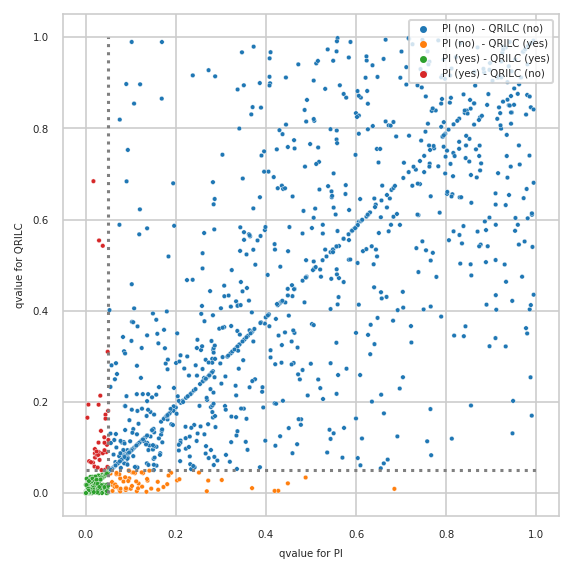

In [20]:
figsize = (4, 4)
size = 5
fig, ax = plt.subplots(figsize=figsize)
x_col = to_plot.columns[0]
y_col = to_plot.columns[1]
ax = sns.scatterplot(data=to_plot,
                     x=x_col,
                     y=y_col,
                     s=size,
                     hue='Differential Analysis Comparison',
                     ax=ax)
_ = ax.legend(fontsize=fontsize,
              title_fontsize=fontsize,
              markerscale=0.4,
              title='',
              )
ax.set_xlabel(f"qvalue for {x_col}")
ax.set_ylabel(f"qvalue for {y_col}")
ax.hlines(0.05, 0, 1, color='grey', linestyles='dotted')
ax.vlines(0.05, 0, 1, color='grey', linestyles='dotted')
sns.move_legend(ax, "upper right")
files_out[f'diff_analysis_comparision_1_{args.model_key}'] = (
    args.out_folder /
    f'diff_analysis_comparision_1_{args.model_key}')
fname = files_out[f'diff_analysis_comparision_1_{args.model_key}']
pimmslearn.savefig(fig, name=fname)

- also showing how many features were measured ("observed") by size of circle

pimmslearn.plotting - INFO     Saved Figures to runs/alzheimer_study/diff_analysis/AD/PI_vs_QRILC/diff_analysis_comparision_2_QRILC


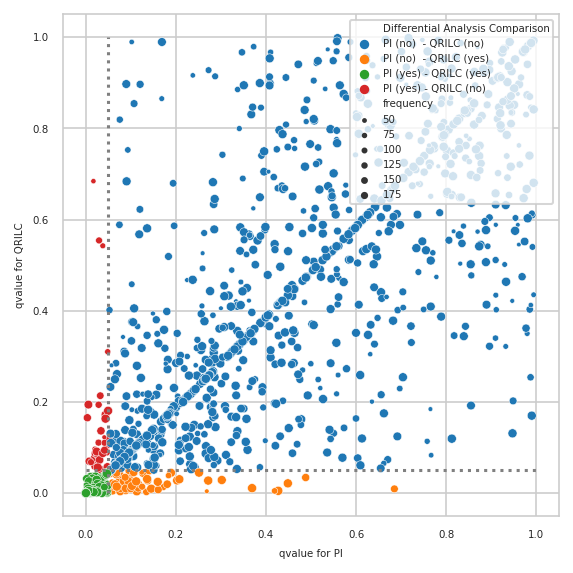

In [21]:
fig, ax = plt.subplots(figsize=figsize)
ax = sns.scatterplot(data=to_plot,
                     x=to_plot.columns[0],
                     y=to_plot.columns[1],
                     size='frequency',
                     s=size,
                     sizes=(5, 20),
                     hue='Differential Analysis Comparison')
_ = ax.legend(fontsize=fontsize,
              title_fontsize=fontsize,
              markerscale=0.6,
              title='',
              )
ax.set_xlabel(f"qvalue for {x_col}")
ax.set_ylabel(f"qvalue for {y_col}")
ax.hlines(0.05, 0, 1, color='grey', linestyles='dotted')
ax.vlines(0.05, 0, 1, color='grey', linestyles='dotted')
sns.move_legend(ax, "upper right")
files_out[f'diff_analysis_comparision_2_{args.model_key}'] = (
    args.out_folder / f'diff_analysis_comparision_2_{args.model_key}')
pimmslearn.savefig(
    fig, name=files_out[f'diff_analysis_comparision_2_{args.model_key}'])

## Only features contained in model
- this block exist due to a specific part in the ALD analysis of the paper

In [22]:
scores_model_only = scores.reset_index(level=-1, drop=True)
_diff = scores_model_only.index.difference(scores_common.index)
if not _diff.empty:
    scores_model_only = (scores_model_only
                         .loc[
                             _diff,
                             args.model_key]
                         .sort_values(by='qvalue', ascending=True)
                         .join(freq_feat.squeeze().rename(freq_feat.columns.droplevel()[0])
                               )
                         )
    display(scores_model_only)
else:
    scores_model_only = None
    logger.info("No features only in new comparision model.")

if not _diff.empty:
    scores_model_only.to_excel(writer, 'only_model', **writer_args)
    display(scores_model_only.rejected.value_counts())
    scores_model_only_rejected = scores_model_only.loc[scores_model_only.rejected]
    scores_model_only_rejected.to_excel(
        writer, 'only_model_rejected', **writer_args)

root - INFO     No features only in new comparision model.


## DISEASES DB lookup

Query diseases database for gene associations with specified disease ontology id.

In [23]:
data = pimmslearn.databases.diseases.get_disease_association(
    doid=args.disease_ontology, limit=10000)
data = pd.DataFrame.from_dict(data, orient='index').rename_axis('ENSP', axis=0)
data = data.rename(columns={'name': args.annotaitons_gene_col}).reset_index(
).set_index(args.annotaitons_gene_col)
data

,ENSP,score
None,,
PSEN2,ENSP00000355747,5.000
APOE,ENSP00000252486,5.000
PSEN1,ENSP00000326366,5.000
APP,ENSP00000284981,5.000
CLU,ENSP00000315130,4.263
...,...,...
HBS1L,ENSP00000356811,0.508
SMAD9,ENSP00000369154,0.506
ANKRD11,ENSP00000301030,0.506


## Shared features
ToDo: new script -> DISEASES DB lookup

In [24]:
feat_name = scores.index.names[0]  # first index level is feature name
if args.annotaitons_gene_col in scores.index.names:
    logger.info(f"Found gene annotation in scores index:  {scores.index.names}")
else:
    logger.info(f"No gene annotation in scores index:  {scores.index.names}"
                " Exiting.")
    import sys
    sys.exit(0)

root - INFO     No gene annotation in scores index:  ['protein groups', 'Source'] Exiting.


SystemExit: 0

/usr/share/miniconda3/envs/pimms/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3516: UserWarning: To exit: use 'exit', 'quit', or Ctrl-D.
  warn("To exit: use 'exit', 'quit', or Ctrl-D.", stacklevel=1)


In [ ]:
gene_to_PG = (scores.droplevel(
    list(set(scores.index.names) - {feat_name, args.annotaitons_gene_col})
)
    .index
    .to_frame()
    .reset_index(drop=True)
    .set_index(args.annotaitons_gene_col)
)
gene_to_PG.head()

In [ ]:
disease_associations_all = data.join(
    gene_to_PG).dropna().reset_index().set_index(feat_name).join(annotations)
disease_associations_all

## only by model

In [ ]:
idx = disease_associations_all.index.intersection(scores_model_only.index)
disease_assocications_new = disease_associations_all.loc[idx].sort_values(
    'score', ascending=False)
disease_assocications_new.head(20)

In [ ]:
mask = disease_assocications_new.loc[idx, 'score'] >= 2.0
disease_assocications_new.loc[idx].loc[mask]

## Only by model which were significant

In [ ]:
idx = disease_associations_all.index.intersection(
    scores_model_only_rejected.index)
disease_assocications_new_rejected = disease_associations_all.loc[idx].sort_values(
    'score', ascending=False)
disease_assocications_new_rejected.head(20)

In [ ]:
mask = disease_assocications_new_rejected.loc[idx, 'score'] >= 2.0
disease_assocications_new_rejected.loc[idx].loc[mask]

## Shared which are only significant for by model

In [ ]:
mask = (scores_common[(str(args.model_key), 'rejected')] & mask_different)
mask.sum()

In [ ]:
idx = disease_associations_all.index.intersection(mask.index[mask])
disease_assocications_shared_rejected_by_model = (disease_associations_all.loc[idx].sort_values(
    'score', ascending=False))
disease_assocications_shared_rejected_by_model.head(20)

In [ ]:
mask = disease_assocications_shared_rejected_by_model.loc[idx, 'score'] >= 2.0
disease_assocications_shared_rejected_by_model.loc[idx].loc[mask]

## Only significant by RSN

In [ ]:
mask = (scores_common[(str(args.baseline), 'rejected')] & mask_different)
mask.sum()

In [ ]:
idx = disease_associations_all.index.intersection(mask.index[mask])
disease_assocications_shared_rejected_by_RSN = (
    disease_associations_all
    .loc[idx]
    .sort_values('score', ascending=False))
disease_assocications_shared_rejected_by_RSN.head(20)

In [ ]:
mask = disease_assocications_shared_rejected_by_RSN.loc[idx, 'score'] >= 2.0
disease_assocications_shared_rejected_by_RSN.loc[idx].loc[mask]

## Write to excel

In [ ]:
disease_associations_all.to_excel(
    writer, sheet_name='disease_assoc_all', **writer_args)
disease_assocications_new.to_excel(
    writer, sheet_name='disease_assoc_new', **writer_args)
disease_assocications_new_rejected.to_excel(
    writer, sheet_name='disease_assoc_new_rejected', **writer_args)

## Outputs

In [ ]:
writer.close()
files_out